Для показа карты необходимо установить ipyleaflet

Using pip:

## $ pip install ipyleaflet

 $ jupyter nbextension enable --py --sys-prefix ipyleaflet

Using conda:

## $ conda install -c conda-forge ipyleaflet

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import timeit
import warnings
from itertools import product
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

In [3]:
import matplotlib as mpl
import matplotlib.cm
import matplotlib.colors
import numpy as np

def n_colors(n, colormap=mpl.cm.Blues):
    data = np.linspace(0.0,1.0,n)
    c = [mpl.colors.rgb2hex(d[0:3]) for d in colormap(data)]
    return c

def data_to_colors(data, colormap=mpl.cm.Blues):
    c = [mpl.colors.rgb2hex(d[0:3]) for d in colormap(mpl.colors.Normalize()(data))]
    return c

In [4]:
#Функция возвращает код региона по координатам
#0- когда нет региона
def get_region(lon,lat):
    r=0
    r=regions.loc[(regions.west<lon)&
           (regions.east>lon)&
           (regions.south<lat)&
           (regions.north>lat)
           ,'region'].values
    if r.shape[0]==0:
        return 0
    return r[0]

In [5]:
# загружаем данные регионов
regions=pd.read_csv('g:/python_kurs/kurs6/taxi/regions.csv',sep=';')
regions.head(6)

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061
5,6,-74.25559,-74.244478,40.538061,40.546449


In [6]:
# загружаем агрегированные данные за май 2016
data=pd.read_csv('g:/python_kurs/kurs6/taxi/data_05_2016.csv')
data.head(6)

,year,month,day,pickup_hour,region_pickup,vcount
0,2016,5,1,0,1,0
1,2016,5,1,0,2,0
2,2016,5,1,0,3,0
3,2016,5,1,0,4,0
4,2016,5,1,0,5,0
5,2016,5,1,0,6,0


 Просуммируйте общее количество поездок такси из каждой географической зоны и посчитайте количество ячеек, из которых в мае не было совершено ни одной поездки.

In [7]:
data_region=data.groupby(by=['region_pickup'],axis=0)[['vcount']].sum().reset_index()
print 'Количество ячеек, из которых в мае не было совершено ни одной поездки ',len(data_region[data_region.vcount==0])

Количество ячеек, из которых в мае не было совершено ни одной поездки  1283


In [8]:
data_region.head()

,region_pickup,vcount
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [9]:
#Координаты Empire State Building
lat = 40.748445
lon = -73.985664
region = get_region(lon,lat)
print region

1231


In [10]:
center = [lat, lon]
zoom = 20

In [11]:
mark = Marker(location=center)


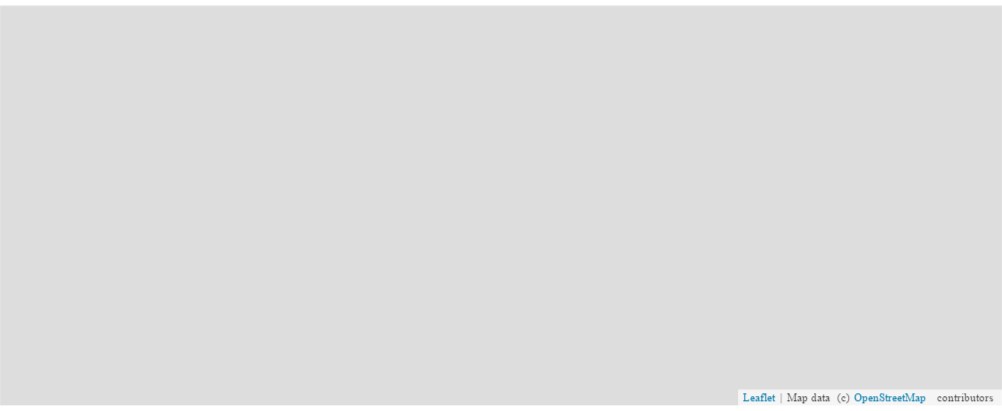

In [12]:
#Нарисуйте статическую карту Нью-Йорка. Поставьте на карте точку там, где находится Эмпайр-Стейт-Билдинг.
m = Map(center=center, zoom=zoom)
m += mark
m.dragging=False
m.double_click_zoom=False
m.keyboard=False
m.tap=False
m.touch_zoom=False
m.zoom_control=False
m

Поверх статической карты Нью-Йорка визуализируйте данные о поездках из каждой ячейки так, чтобы цветовая шкала, в которую вы окрашиваете каждую ячейку, показывала суммарное количество поездок такси из неё.

In [13]:
zoom = 10
m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
m += mark
m.dragging=False
m.double_click_zoom=False
m.keyboard=False
m.tap=False
m.touch_zoom=False
m.zoom_control=False


In [14]:
colors1 = data_to_colors(data_region['vcount'])

In [15]:
%%time
dr=data_region['region_pickup']
dr=np.arange(1,2500,1)
for region, color in zip(dr, colors1):
    #print region,color
    r=regions.loc[regions.region==region]
    bounds = [(r.north.values[0],r.west.values[0]),
              (r.north.values[0],r.east.values[0]),
              (r.south.values[0],r.east.values[0]),
              (r.south.values[0],r.west.values[0])
          ]
    #print r,bounds
    pg = Polygon(locations=bounds, weight=3,
            color=color, opacity=0.8, fill_opacity=0.5,
            fill_color=color)
    m += pg
    

Wall time: 53.1 s


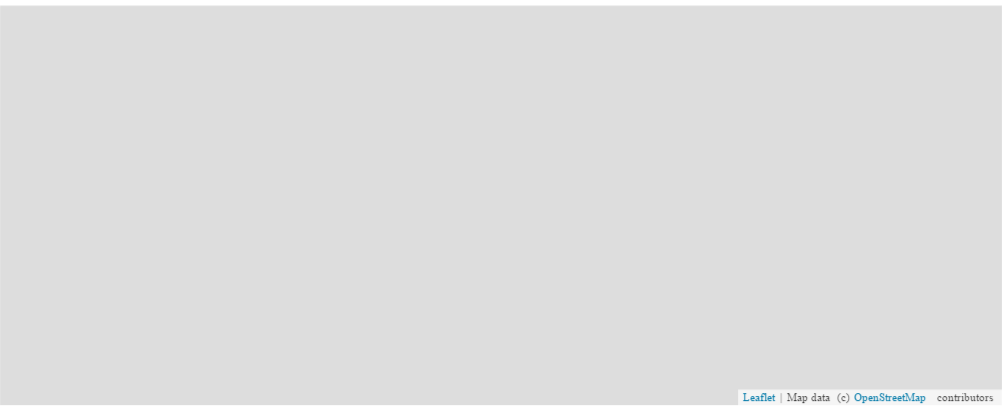

In [16]:
m

Вставьте интерактивную карту Нью-Йорка — такую, которую можно прокручивать и увеличивать. Поставьте метку там, где находится статуя свободы.

In [17]:
#Координаты статуи свободы
lat = 40.689237
lon = -74.044521
region = get_region(lon,lat)
print region




924


In [18]:
center = [lat, lon]
zoom = 15
mark = Marker(location=center)

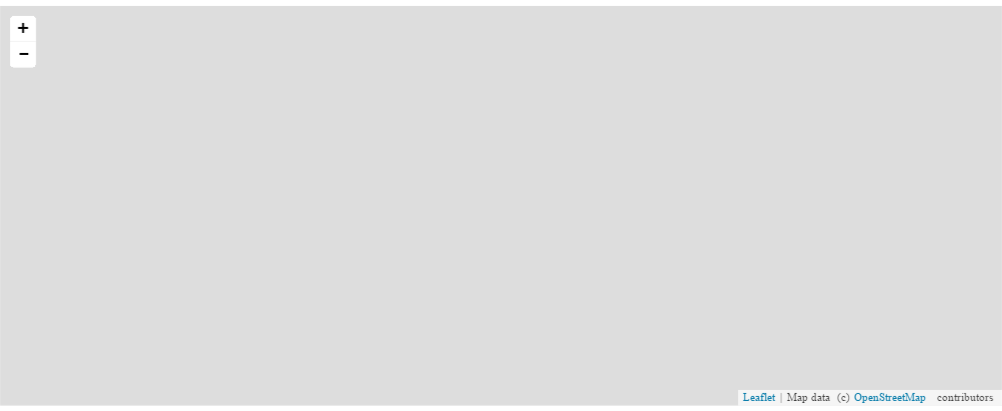

In [19]:
m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
m

In [20]:
m += mark

Нарисуйте на интерактивной карте Нью-Йорка ячейки так, чтобы их цвет показывал среднее за месяц количество поездок такси в час из этой зоны.

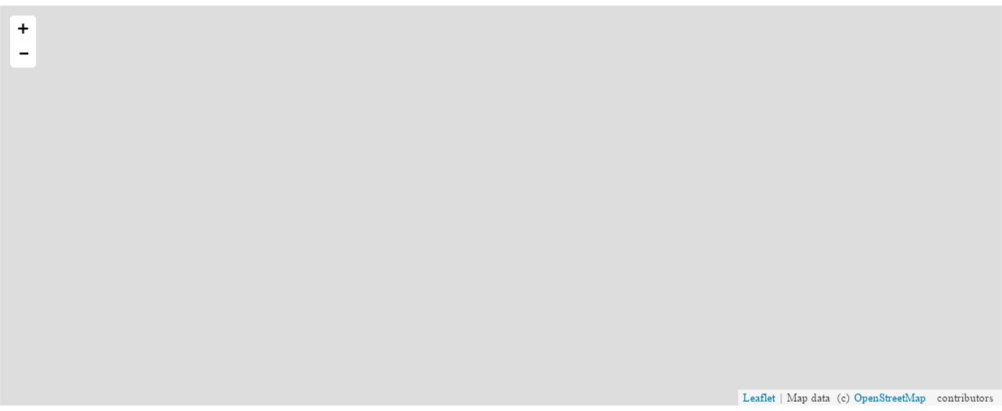

In [21]:
zoom = 10
m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
m

In [22]:
m += mark

In [23]:
data_r_mean=data.groupby(by=['region_pickup'],axis=0)[['vcount']].mean().reset_index()
data_r_mean.head()

,region_pickup,vcount
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [24]:
print data_r_mean[data_r_mean.region_pickup==1231]

      region_pickup      vcount
1230           1231  657.915323


In [25]:
data_rm=data_r_mean.loc[data_r_mean.vcount>=5]
print 'Кол-во ячеек,из которых в мае совершается в среднем больше или равно 5 поездок в час ', len(data_rm)

Кол-во ячеек,из которых в мае совершается в среднем больше или равно 5 поездок в час  102


In [26]:
colors1 = data_to_colors(data_rm['vcount'])

In [27]:
%%time
dr=data_rm['region_pickup']
#dr=np.arange(1,2500,1)
for region, color in zip(dr, colors1):
    #print region,color
    r=regions.loc[regions.region==region]
    bounds = [(r.north.values[0],r.west.values[0]),
              (r.north.values[0],r.east.values[0]),
              (r.south.values[0],r.east.values[0]),
              (r.south.values[0],r.west.values[0])
          ]
    #print r,bounds
    pg = Polygon(locations=bounds, weight=3,
            color=color, opacity=0.8, fill_opacity=0.5,
            fill_color=color)
    
    m += pg
    

Wall time: 672 ms
